In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta

In [2]:
with open("./OGPeriods.csv", 'r') as file:
  csvreader = csv.reader(file)
  next(csvreader)
  sDateOG = []
  eDateOG = []
  i = 1
  for row in csvreader:
    date1 = row[2]
    date1 = date1.split("T")
    st_date = date1[0]
    sDateOG.append(st_date)
    date2 = row[3]
    date2 = date2.split("T")
    end_date = date2[0]
    eDateOG.append(end_date)
    i += 1

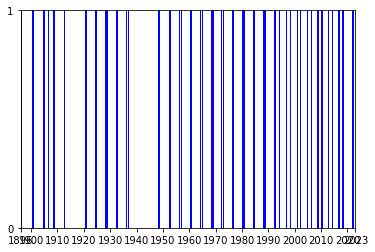

In [3]:
x_all_labels = ['1900-01-01', '1910-01-01', '1920-01-01', '1930-01-01', '1940-01-01', '1950-01-01', '1960-01-01', '1970-01-01', '1980-01-01', '1990-01-01', '2000-01-01', '2010-01-01', '2020-01-01']
x_all_labels_final = ['1900', '1910', '1920', '1930', '1940','1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
x_start = datetime.strptime('1896-01-01', '%Y-%m-%d')
x_end = datetime.strptime('2023-01-01', '%Y-%m-%d')
x_start_label = '1896'
x_end_label = '2023'
x_all = [datetime.strptime(date, '%Y-%m-%d').date() for date in x_all_labels]
sDateOG_dt = [datetime.strptime(date, '%Y-%m-%d').date() for date in sDateOG]
eDateOG_dt = [datetime.strptime(date, '%Y-%m-%d').date() for date in eDateOG]

datesOG = []
datesOGOnly = []
datesY = [1, 1]
for i in range(len(sDateOG_dt)):
  datesX = []
  datesX.append(sDateOG_dt[i])
  datesX.append(eDateOG_dt[i])
  datesOG.append(datesX)
  datesOGOnly.append(datesX)
  datesOG.append(datesY)
  
plt.rcParams["figure.figsize"] = (20,0.5)
fig, ax = plt.subplots()

xticks = [x_start, *x_all, x_end]
ticklabels = [x_start_label, *x_all_labels_final, x_end_label]
ax.set_yticks((0,1))
ax.set_yticklabels((0,1))
plt.xticks(xticks, ticklabels)
plt.plot(*datesOG , color="blue")
for j in range(int(len(datesOG)/2)):
  j = j*2
  plt.fill_between(datesOG[j], datesOG[j+1], color="blue")  
plt.xlim(x_start, x_end)
plt.ylim(0, 1)
plt.show()

In [4]:
with open("./WarPeriods.csv", 'r') as file:
  csvreader = csv.reader(file)
  next(csvreader)
  sDateWar = []
  eDateWar = []
  i = 1
  for row in csvreader:
    date1 = row[2]
    date1 = date1.split("T")
    st_date = date1[0]
    sDateWar.append(st_date)
    date2 = row[3]
    date2 = date2.split("T")
    end_date = date2[0]
    eDateWar.append(end_date)
    i += 1

2026-12-31


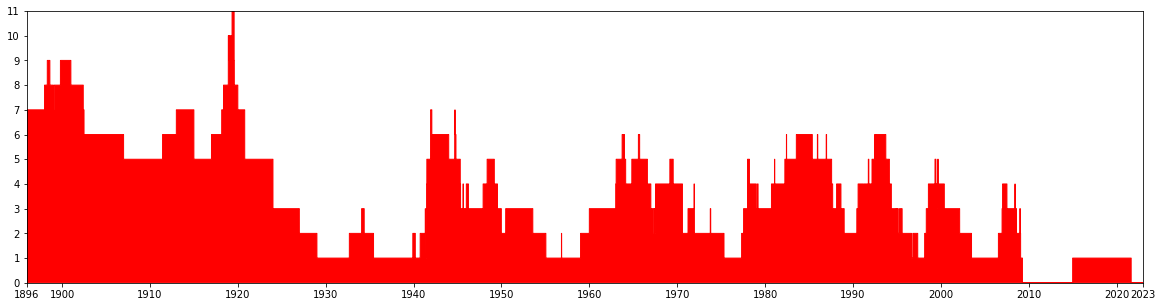

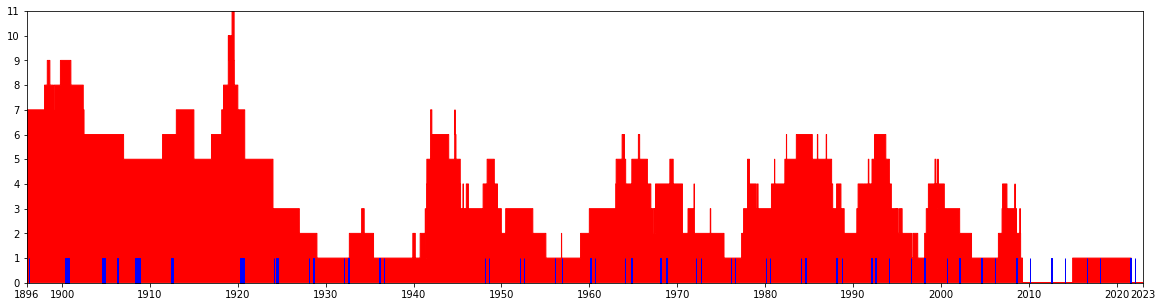

In [5]:
def filter_date(date):
  try:
    if date != datetime.strptime(date, "%Y-%m-%d").strftime('%Y-%m-%d'):
      raise ValueError
    return True
  except ValueError:
        return False

sDateWar = filter(filter_date, sDateWar)
eDateWar = filter(filter_date, eDateWar)
sDateWar_dt = [datetime.strptime(date, '%Y-%m-%d').date() for date in sDateWar]
eDateWar_dt = [datetime.strptime(date, '%Y-%m-%d').date() for date in eDateWar]

datesWar = []
datesWarOnly = []
datesY = [1, 1]
for i in range(len(sDateWar_dt)):
  datesX = []
  datesX.append(sDateWar_dt[i])
  datesX.append(eDateWar_dt[i])
  datesWar.append(datesX)
  datesWarOnly.append(datesX)
  datesWar.append(datesY)

datesWarOnly.sort()

start_date = datesWarOnly[0:1][0][0]
# end_date = datesWarOnly[-1:][0][1]
end_date = date(2026, 12, 31)
print(end_date)

def daterange(start_date, end_date):
  for n in range(int((end_date - start_date).days)):
    yield start_date + timedelta(n)

datesXLevel = []
datesLevels = []
datesXLevel0 = []
datesLevel0 = []
for single_date in daterange(start_date, end_date):
  level = 0
  for period in datesWarOnly:
    if (period[0]<single_date<period[1]):
      level += 1
  datesXLevel.append(single_date)
  datesLevels.append(level)
plt.rcParams["figure.figsize"] = (20,5)
fig, ax = plt.subplots()
ax.set_yticks((0,1,2,3,4,5,6,7,8,9,10,11))
ax.set_yticklabels((0,1,2,3,4,5,6,7,8,9,10,11))
xticks = [x_start, *x_all, x_end]
ticklabels = [x_start_label, *x_all_labels_final, x_end_label]
plt.xticks(xticks, ticklabels)
plt.fill_between(datesXLevel, datesLevels, color="red")
plt.xlim(x_start, x_end)
plt.ylim(0, 11)
plt.show()

plt.rcParams["figure.figsize"] = (20,5)
fig, ax = plt.subplots()
ax.set_yticks((0,1,2,3,4,5,6,7,8,9,10,11))
ax.set_yticklabels((0,1,2,3,4,5,6,7,8,9,10,11))
xticks = [x_start, *x_all, x_end]
ticklabels = [x_start_label, *x_all_labels_final, x_end_label]
plt.xticks(xticks, ticklabels)
plt.fill_between(datesXLevel, datesLevels, color="red") 
for j in range(int(len(datesOG)/2)):
  j = j*2
  plt.fill_between(datesOG[j], datesOG[j+1], color="blue")  
plt.xlim(x_start, x_end)
plt.ylim(0, 11)
plt.show()

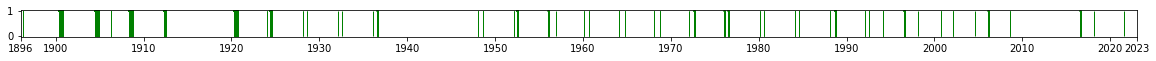

In [6]:
plt.rcParams["figure.figsize"] = (20,0.5)
fig, ax = plt.subplots()
ax.set_yticklabels([])
datesIntersections = []
datesY = [1, 1]
for i in range(len(datesWarOnly)):
   for j in range(len(datesOGOnly)):
      intersection = []
      if(datesWarOnly[i][0]<=datesOGOnly[j][0]<=datesWarOnly[i][1]<=datesOGOnly[j][1]):
        intersection.append(datesOGOnly[j][0])
        intersection.append(datesWarOnly[i][1])
        datesIntersections.append(intersection)
        datesIntersections.append(datesY)
      elif(datesWarOnly[i][0]<=datesOGOnly[j][0]<=datesOGOnly[j][1]<=datesWarOnly[i][1]):
        intersection.append(datesOGOnly[j][0])
        intersection.append(datesOGOnly[j][1])
        datesIntersections.append(intersection)
        datesIntersections.append(datesY)
      elif(datesOGOnly[j][0]<=datesWarOnly[i][0]<=datesOGOnly[j][1]<=datesWarOnly[i][1]):
        intersection.append(datesWarOnly[i][0])
        intersection.append(datesOGOnly[j][1])
        datesIntersections.append(intersection)
        datesIntersections.append(datesY)
      elif(datesOGOnly[j][0]<=datesWarOnly[i][0]<=datesWarOnly[i][1]<=datesOGOnly[j][1]):
        intersection.append(datesWarOnly[i][0])
        intersection.append(datesWarOnly[i][1])
        datesIntersections.append(intersection)
        datesIntersections.append(datesY)

ax.set_yticks((0,1))
ax.set_yticklabels((0,1))
plt.xticks(xticks, ticklabels)  
plt.plot(*datesIntersections , color="green")
for j in range(int(len(datesIntersections)/2)):
  j = j*2
  plt.fill_between(datesIntersections[j], datesIntersections[j+1], color="green")
plt.xlim(x_start, x_end)
plt.show()

In [7]:
All_intersections = []
def date_month_before_OG(date_starts_OG):
  date_month_before = date_starts_OG + relativedelta(months=-1)
  return date_month_before
def date_month_after_OG(date_ends_OG):
  date_month_after = date_ends_OG + relativedelta(months=+1)
  return date_month_after
def date_week_before_OG(date_starts_OG):
  date_week_before = date_starts_OG + relativedelta(weeks=-1)
  return date_week_before
def date_week_after_OG(date_ends_OG):
  date_week_after = date_ends_OG + relativedelta(weeks=+1)
  return date_week_after
def filter_date(date):
  if (date[1]>x_start.date()):
    return True
  else:
    return False

datesWarOnly = list(filter(filter_date, datesWarOnly))
print('Wars', len(list(datesWarOnly)))
print('OG', len(datesOGOnly))
hypothesysTrue = 0
for i in range(len(datesWarOnly)):
  for j in range(len(datesOGOnly)):
    # if(date_month_before_OG(datesOGOnly[j][0])<=datesWarOnly[i][1]<=datesOGOnly[j][0] or datesOGOnly[j][1]<=datesWarOnly[i][0]<=date_month_after_OG(datesOGOnly[j][1])):
    if(date_month_before_OG(datesOGOnly[j][0])<=datesWarOnly[i][1]<=datesOGOnly[j][0] or datesOGOnly[j][1]<=datesWarOnly[i][0]<=date_month_after_OG(datesOGOnly[j][1])):
      hypothesysTrue += 1

for i in range(len(datesWarOnly)):
   for j in range(len(datesOGOnly)):
      if(datesWarOnly[i][0]<=datesOGOnly[j][0]<=datesWarOnly[i][1]<=datesOGOnly[j][1] or 
         datesWarOnly[i][0]<=datesOGOnly[j][0]<=datesOGOnly[j][1]<=datesWarOnly[i][1] or 
         datesOGOnly[j][0]<=datesWarOnly[i][0]<=datesOGOnly[j][1]<=datesWarOnly[i][1] or 
         datesOGOnly[j][0]<=datesWarOnly[i][0]<=datesWarOnly[i][1]<=datesOGOnly[j][1]):
        hypothesysTrue -= 1

print('hypTrue', hypothesysTrue)
for i in range(len(datesWarOnly)):
  for j in range(len(datesOGOnly)):
    if(date_week_before_OG(datesOGOnly[j][0])<=datesWarOnly[i][1]<=datesOGOnly[j][0] or datesOGOnly[j][1]<=datesWarOnly[i][0]<=date_week_after_OG(datesOGOnly[j][1])):
      print(datesOGOnly[j][0], datesOGOnly[j][1], datesWarOnly[i][0], datesWarOnly[i][1])

Wars 92
OG 59
hypTrue -151
1992-07-25 1992-08-09 1992-03-02 1992-07-21
1992-07-25 1992-08-09 1992-08-14 1993-09-27
1998-02-07 1998-02-22 1998-02-27 1999-06-11


In [8]:


def date_before_OG(date_starts_OG, numberMonths):
  date_month_before = date_starts_OG + relativedelta(months=-numberMonths)
  return date_month_before
def date_after_OG(date_ends_OG, numberMonths):
  date_month_before = date_ends_OG + relativedelta(months=+numberMonths)
  return date_month_before
datesOGOnlyCutted = datesOGOnly[:-5]
deltaWarList = []
X = []
for i in range(1, 24):
  deltaWar = 0
  for j in range(len(datesOGOnlyCutted)):
    deltaWar += datesLevels[datesXLevel.index(date_before_OG(datesOGOnlyCutted[j][0], i))] - datesLevels[datesXLevel.index(datesOGOnlyCutted[j][0])]
    deltaWar += datesLevels[datesXLevel.index(date_after_OG(datesOGOnlyCutted[j][1], i))] - datesLevels[datesXLevel.index(datesOGOnlyCutted[j][1])]
  X.append(i)
  deltaWarList.append(deltaWar)

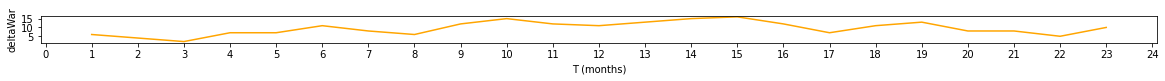

In [9]:

plt.rcParams["figure.figsize"] = (20,0.5)
fig, ax = plt.subplots()
plt.xticks(np.arange(0, 25, 1))
ax.set_xticklabels(np.arange(0, 25, 1))
ax.set_xlabel('T (months)')
ax.set_ylabel('deltaWar') 
plt.plot( X, deltaWarList, color="orange")
plt.show()